# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [138]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [139]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [140]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]

(97, 2)


Text(0, 0.5, 'Bénéfice x1000')

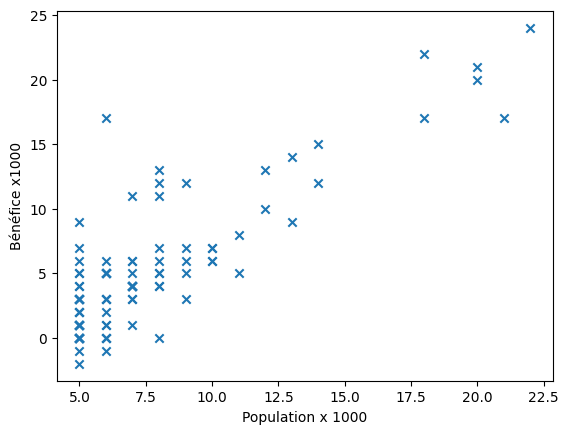

In [141]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

In [ ]:
from sklearn.linear_model import LinearRegression


def plot_costs(costs, iterations):
    plt.figure(figsize=(15, 5))
    plt.plot(range(costs.shape[0]), costs)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [142]:
def computeCost(X, y, theta):
    y_hat = np.dot(X, theta)
    cost = np.sum(np.power(y_hat - y, 2) / (X.shape[0]))
    return cost 
computeCost(X, y, np.array([0,0]))


58.51546391752577

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [143]:
def gradientDescent(X, y, theta, alpha, iterations):
    thetas = []
    costs = []
    for i in range(iterations):
        thetas.append(theta)
        costs.append(computeCost(X, y, theta))
        y_hat = np.dot(X, theta)
        der = 2 * np.dot((y_hat - y).T, X ) /X.shape[0]
        theta = theta - alpha * der
    return np.array(costs), np.array(thetas), theta


# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [144]:
theta = np.array([0,0])

Calculer le cout initial

In [145]:
initialCost=computeCost(X, y, theta)
initialCost

58.51546391752577

Appel des la fonction de calcul du gradient

In [146]:
# paramètres
iterations = 1500
alpha = 0.01
# Appel
costs, thetas, theta = gradientDescent(X, y, theta, alpha, iterations)

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

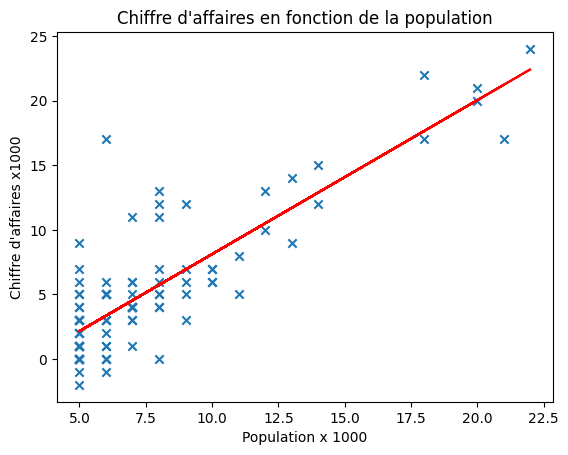

In [147]:
y_pred=np.matmul(X,theta) 

fig, ax = plt.subplots()
ax.scatter(X[:,1], y, marker='x', label='Predicted Data')
ax.plot(X[:,1], y_pred, color='red', label='Hypothesis: h(x) = %0.2f + %0.2f x' % (theta[0], theta[1]))
ax.set_xlabel('Population x 1000')
ax.set_ylabel('Chiffre d\'affaires x1000')
ax.set_title('Chiffre d\'affaires en fonction de la population')

plt.show()

Traçage du coût en fonction de theta0 et theta1

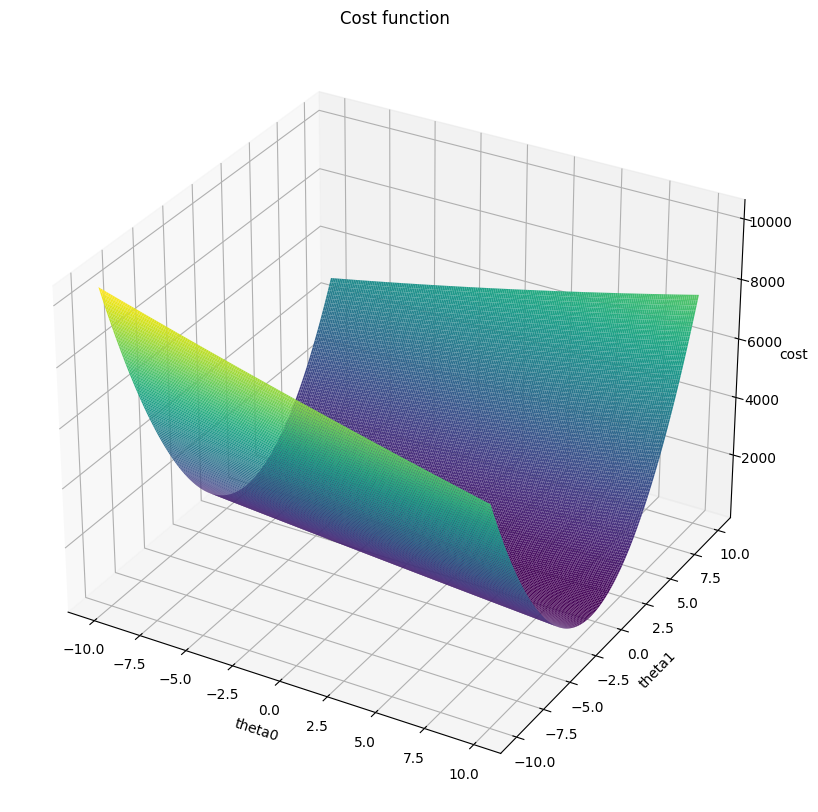

In [148]:
th0 = th1 = np.arange(-10, 10, 0.1)
th0, th1 = np.meshgrid(th0, th1)

cost = np.array([computeCost(X, y, np.array([th0, th1])) for th0, th1 in zip(np.ravel(th0), np.ravel(th1))])

cost = np.reshape(cost, th0.shape)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('cost')
ax.set_title('Cost function')
ax.plot_surface(th0, th1, cost, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()

Prédire des valeurs de y

In [149]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

0.3733308569284516

In [150]:
predict2 = np.matmul([1, 7],theta)
predict2

4.544252609361598

## Comparaison avec sickit learn

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [151]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [152]:
# d'abord créer X et y
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,0:2]))
y = dataMulti[:, 2]
X.shape, y.shape

((47, 3), (47,))

In [154]:
# redéfinissez vos fonctions de coût si cela est necessaire
theta_not_normalized = np.array([0,0,0])
alpha = 0.000000001
iterations = 1500
costs_not_normalized, thetas, theta_not_normalized = gradientDescent(X, y, theta_not_normalized, alpha, iterations)
theta_not_normalized

array([1.00206262e-01, 1.65382664e+02, 2.88656501e-01])

Mise à l'échelle des données

In [155]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X)
X_normalized = scalar.transform(X)


Normalisation des données en moyenne = 0

Appliquer la descente du gradient à plusieurs variables

In [156]:
theta_normalized = np.array([0,0,0])
alpha = 0.01
iterations = 1500
costs_normalized, thetas_normalized, theta_normalized = gradientDescent(X_normalized, y, theta_normalized, alpha, iterations)
theta_normalized

array([     0.        , 109447.66435301,  -6578.17562431])

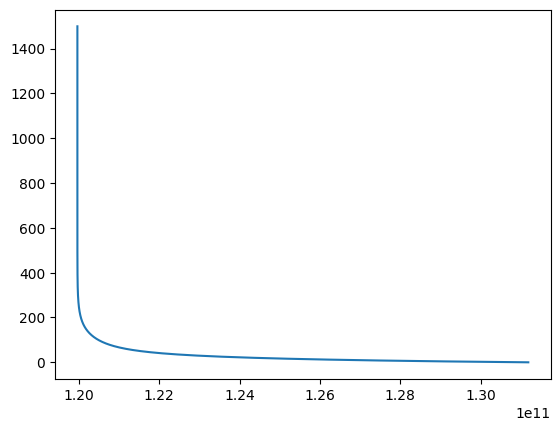

In [159]:
plt.plot(costs_normalized, np.arange(iterations))

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [164]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
Y_pred_sk = sk_model.fit(X, y)
sk_model.coef_

array([    0.        ,   139.21063465, -8737.91542019])

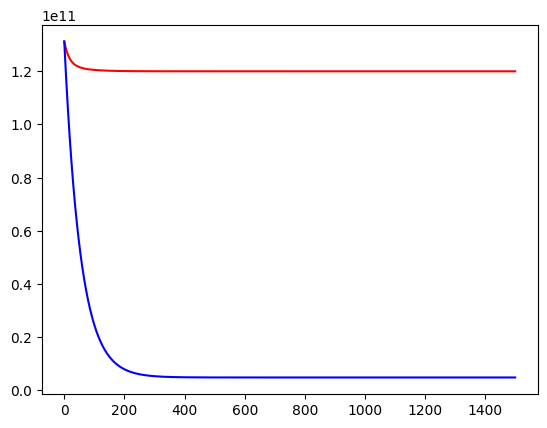

In [165]:
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), costs_normalized, label='Gradient Descent', color='red')
ax.plot(np.arange(iterations), costs_not_normalized, label='Gradient Descent without normalization', color='blue')
plt.show()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance